## 1. Google Play Store apps and reviews
<p>Mobile apps dominate Google Play Store. In this notebook, we will compare over ten thousand apps in Google Play across different categories. We'll visualize the most important features and their relationships.</p>
<p>The dataset which contains of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play, consisting of 13 features that describe an app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app. The text in each review has been pre-processed into three features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [4]:
import pandas as pd
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go


# Read Raw CSV file
apps_double = pd.read_csv('datasets/apps.csv')

# Remove redundant apps 
apps = apps_double.drop_duplicates()

## 2. Data cleaning
<p>We observed that the three essential features which are Installs, Price and Size contains some special characters such as ", $ +" and the letter "M". First, we need to remove these characters and then convert the Columns into numeric data type for further processing.</p>

In [5]:

# A nested Loop thats iterate over each row in the dataset
for c in ['Installs', 'Size', 'Price'] :
    for char in ['+', ',', 'M', '$'] :
        # Replace each value in Column C with empty Quotes
        apps[c] = apps[c].str.replace(char, '')
    # Convert the value into numeric
    apps[c] = pd.to_numeric(apps[c]) 

## 3. Exploring app categories
<p>There are alot of app categories in our dataset, so first, we group apps based on categories that can be visualized using the Bar chart below.</p>
<p>
    As can be seen, there are 33 unique app categories with Family and Game having the highest demand.
    </p>

In [6]:

# The number of Categories in the dataset
NumOfCategories = (apps['Category'].unique()).size
print('Number of Categories = ', NumOfCategories)


num_apps_in_category = apps['Category'].value_counts().sort_values(ascending = False)

BarChart = [go.Bar( x = num_apps_in_category.index, y = num_apps_in_category.values, )]

plotly.offline.iplot(BarChart)

Number of Categories =  33


## 4. Distribution of app ratings
<p>In this section we will visualize the distribution of app ratings, scaled from 0 to 5, which are performance indicators of the apps. It is shown that the average rating is equal to 4.17 and the histogram is skewed to the right indicating that most of the apps have high ratings </p>

In [9]:
## Average ratings
avg_rating = apps['Rating'].mean()

print('Average app rating = ', avg_rating)


data = [go.Histogram( x = apps['Rating'] )]


Histogram = {'shapes': [{
              'type' :'line',
              'x0': avg_rating,
              'y0': 0,
              'x1': avg_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': Histogram})

Average app rating =  4.173243045387998


## 5. Size and price of an app
<p>We will now examine the size and price of an app in respect to its rating using jointplot.</p>
<p>It is shown that the majority of top rated apps (rating over 4) range from 1 MB to 20 MB. We also find that the majority of apps'prices are under \$10.</p>

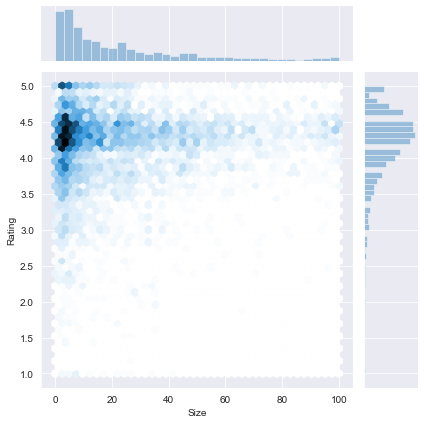

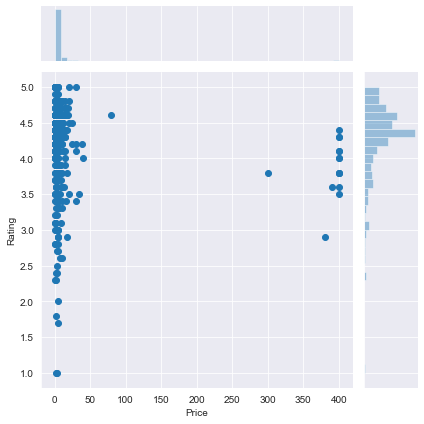

In [19]:
%matplotlib inline
import seaborn as sns

# Retrieving app categories with apps greater than 250 to filter out low categories count
largeCat = apps.groupby(apps['Category']).filter(lambda x: len(x) >= 250).reset_index()

# Plotting size vs rating
plot1 = sns.jointplot(x = largeCat['Size'], y = largeCat['Rating'], kind = 'hex')

paid = apps[apps['Type'] == 'Paid']

# Plotingt price vs rating
plot2 = sns.jointplot(x = paid['Price'], y = paid['Rating'])

## 6. Relation between app category and app price
<p> Now we will select a few popular app categories and examine their price by plotting Price vs Category to visualize the pricing of an app in respect to its category. It is shown below that the Medical and Family apps are the most expensive.Below, we see that LifeStyle, Finance and Family apps are the most expensive. All game apps are priced below \$20.</p>

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


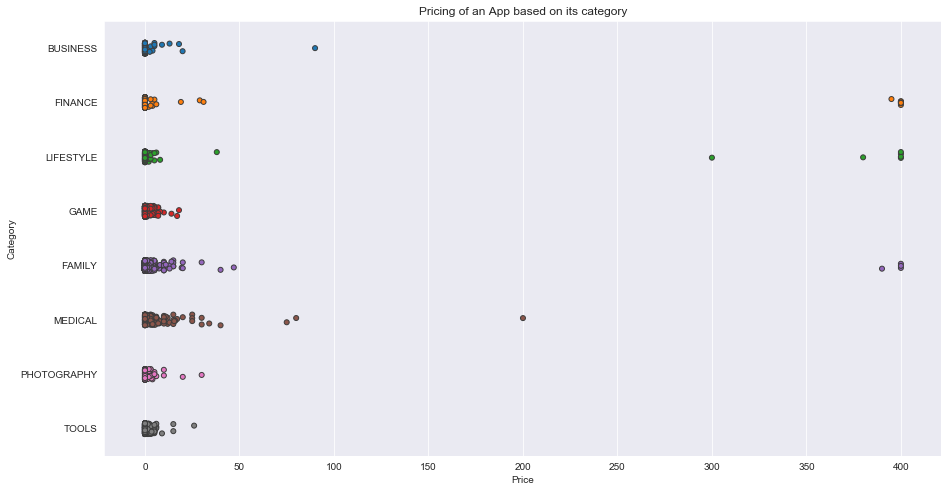

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Grouping the most popular app categories
popular_app = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price by plotting Price vs Category
ax = sns.stripplot(x = popular_app['Price'], y = popular_app['Category'], jitter=True, linewidth=1)
ax.set_title('Pricing of an App based on its category')

# Displaying the most expensive apps
exp_apps = popular_app_cats[['Category', 'App', 'Price']][popular_app['Price'] > 250]
exp_apps

## 7. Filter out "junk" apps
<p>This step filters out some junk apps that do not have a purpose that are joke and testing apps. We will select apps priced below \$80 to try and filter out these expensive apps.</p>

Text(0.5, 1.0, 'Pricing of an App based on its category after filtering junk apps')

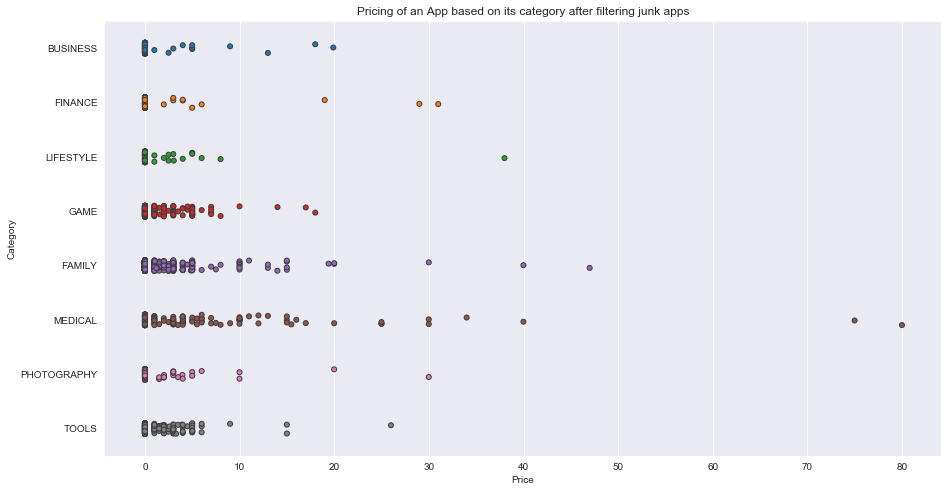

In [27]:
# Select apps priced below $80
apps_80 = popular_app_cats[popular_app['Price'] < 80]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps
ax = sns.stripplot(x = apps_80['Price'], y = apps_80['Category'],
                   jitter=True, linewidth=1)
ax.set_title('Pricing of an App based on its category after filtering junk apps')

## 8. Popularity of paid apps vs free apps
<p> We will now visualize the popularity of paid apps vs free apps by using boxplots. It is shown by the boxplots below that free apps are more popular than paid apps as the median value of downloads of free apps is greater than paid apps. It makes sense because people tend to download free apps rather than paying money for paid apps.</p>

In [29]:
trace0 = go.Box(
## Retrieving paid apps
    y=apps['Installs'][apps['Type'] == 'Paid'],
    name = 'paid'
)

## Retrieving free apps
trace1 = go.Box(
    y=apps['Installs'][apps['Type'] == 'Free'],
    name = 'free'
)

Boxplot = go.Layout(
    title = "Downloads of paid apps vs free apps",
    yaxis = dict(
        type = 'log',
        autorange = True
    )
)

data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': Boxplot})

## 9. Sentiment analysis of user reviews
<p> The sentiment analysis of user reviews allow us to analyze the user reviews of the apps based on the sentiment polarity. We will use boxplots to differentiate between the paid apps and free apps' user reviews. It is shown that free apps have more negative reviews than paid apps as indicated by outliers which makes sense because on average paid apps have higher quality than free apps.</p>

Text(0.5, 1.0, 'Sentiment Polarity Plot')

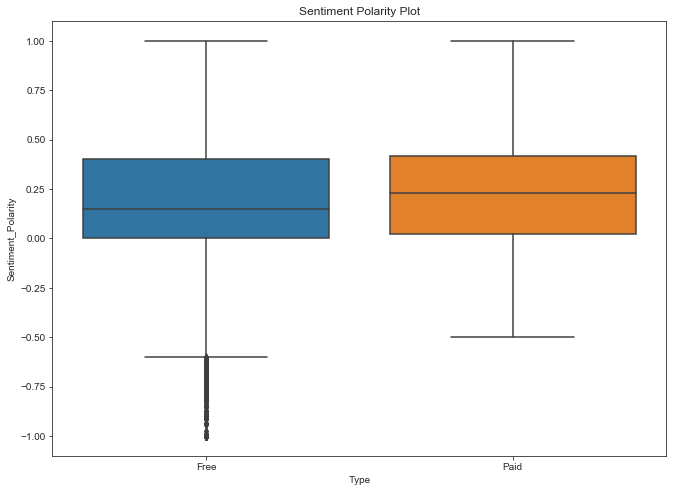

In [35]:
# Load user reviews dataset
reviews = pd.read_csv('datasets/user_reviews.csv')

# Join the two datasets
merged = pd.merge(apps, reviews, on = 'App', how = "inner")

# Drop NA values from Sentiment and Translated_Review columns to optimize our analysis
merged = merged.dropna(subset=['Sentiment', 'Translated_Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# Sentiment polarity reviews of paid apps vs free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged.loc[:, ['Type', 'Sentiment_Polarity']])
ax.set_title('Sentiment Polarity Plot')